In [107]:
# imported all required libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [108]:
#Using pandas, read the data into a variable called df and printed the output
df = pd.read_excel('Dataset/Raw/311_Service_Requests_20251022.xls')
print(df)

           SR_NUMBER                      SR_TYPE SR_SHORT_CODE  \
0      SR25-01948318     Aircraft Noise Complaint           AVN   
1      SR25-01948317   Street Light Out Complaint           SFD   
2      SR25-01948316     Aircraft Noise Complaint           AVN   
3      SR25-01948315    311 INFORMATION ONLY CALL        311IOC   
4      SR25-01948314     Aircraft Noise Complaint           AVN   
...              ...                          ...           ...   
65530  SR25-01869126  Pothole in Street Complaint           PHF   
65531  SR25-01869125    311 INFORMATION ONLY CALL        311IOC   
65532  SR25-01869124    311 INFORMATION ONLY CALL        311IOC   
65533  SR25-01869122    311 INFORMATION ONLY CALL        311IOC   
65534  SR25-01869121     Aircraft Noise Complaint           AVN   

                        CREATED_DEPARTMENT  \
0                                      NaN   
1      CDOT - Department of Transportation   
2                                      NaN   
3          

In [109]:
# select features that are required for the model

df_features = df[['SR_TYPE', 'OWNER_DEPARTMENT', 'STATUS', 'ORIGIN', 'CREATED_HOUR', 'CREATED_DAY_OF_WEEK', 'CREATED_MONTH', 'LATITUDE', 'LONGITUDE', 'WARD', 'COMMUNITY_AREA']]
print(df_features)

                           SR_TYPE                     OWNER_DEPARTMENT  \
0         Aircraft Noise Complaint                             Aviation   
1       Street Light Out Complaint  CDOT - Department of Transportation   
2         Aircraft Noise Complaint                             Aviation   
3        311 INFORMATION ONLY CALL                    311 City Services   
4         Aircraft Noise Complaint                             Aviation   
...                            ...                                  ...   
65530  Pothole in Street Complaint  CDOT - Department of Transportation   
65531    311 INFORMATION ONLY CALL                    311 City Services   
65532    311 INFORMATION ONLY CALL                    311 City Services   
65533    311 INFORMATION ONLY CALL                    311 City Services   
65534     Aircraft Noise Complaint                             Aviation   

          STATUS      ORIGIN  CREATED_HOUR  CREATED_DAY_OF_WEEK  \
0      Completed    Internet    

In [110]:
# Dropping null values
df_features = df_features.dropna(subset=['LATITUDE', 'LONGITUDE', 'CREATED_HOUR'])
df_features.describe()

,CREATED_HOUR,CREATED_DAY_OF_WEEK,CREATED_MONTH,LATITUDE,LONGITUDE,WARD,COMMUNITY_AREA
count,65315.000000,65315.000000,65315.0,65315.000000,65315.000000,65293.000000,65296.000000
mean,13.306744,3.737533,10.0,41.897127,-87.730142,30.025945,41.828473
std,5.185412,1.971928,0.0,0.079854,0.095483,10.845567,24.146585
min,0.000000,1.000000,10.0,41.644809,-87.907742,1.000000,1.000000
25%,9.000000,2.000000,10.0,41.871834,-87.795722,28.000000,28.000000
50%,13.000000,3.000000,10.0,41.871834,-87.679845,28.000000,28.000000
75%,17.000000,5.000000,10.0,41.994900,-87.679845,41.000000,74.000000
max,23.000000,7.000000,10.0,42.022836,-87.524843,50.000000,77.000000


In [111]:
#encoding categorical variables because Kmeans algorithm doesn't use categorial variables
df_features = pd.get_dummies(df_features, columns=['SR_TYPE', 'OWNER_DEPARTMENT', 'STATUS', 'ORIGIN'], drop_first=True)
print(df_features)

       CREATED_HOUR  CREATED_DAY_OF_WEEK  CREATED_MONTH   LATITUDE  LONGITUDE  \
1                19                    4             10  41.770312 -87.664538   
7                19                    4             10  41.794227 -87.625224   
11               19                    4             10  41.909616 -87.725439   
12               19                    4             10  41.918922 -87.722699   
13               19                    4             10  41.924814 -87.691401   
...             ...                  ...            ...        ...        ...   
65530            23                    6             10  41.708054 -87.568140   
65531            23                    6             10  41.871834 -87.679845   
65532            23                    6             10  41.871834 -87.679845   
65533            23                    6             10  41.871834 -87.679845   
65534            23                    6             10  41.994900 -87.887749   

       WARD  COMMUNITY_AREA

In [112]:
# Scale numeric variables
scaler = StandardScaler()
df_features[['CREATED_HOUR', 'CREATED_DAY_OF_WEEK', 'CREATED_MONTH', 'LATITUDE', 'LONGITUDE', 'WARD', 'COMMUNITY_AREA']]= scaler.fit_transform(df_features[['CREATED_HOUR', 'CREATED_DAY_OF_WEEK', 'CREATED_MONTH', 'LATITUDE', 'LONGITUDE', 'WARD', 'COMMUNITY_AREA']])

In [113]:
#Dimensionality Reduction

pca = PCA(n_components=10, random_state=42)
df_features = df_features.fillna(0)
X_pca = pca.fit_transform(df_features)

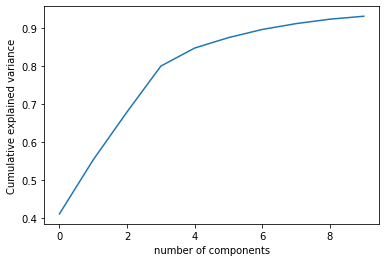

In [114]:
#PCA explained Variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [115]:
#Dimensionality Reduction - using the chart to change the number of components to 3

pca = PCA(n_components=3, random_state=42)
df_features = df_features.fillna(0)
X_pca = pca.fit_transform(df_features)

In [116]:
#Kmeans clustering algorithm

kmeans = KMeans(n_clusters= 6, random_state=42)
# df_features['cluster'] = kmeans.fit_predict(X_pca)
# print(df_features)

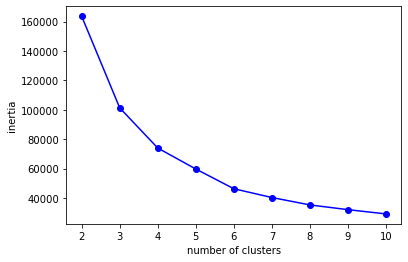

In [117]:
# finding the best number of clusters
intertias = []

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    intertias.append(kmeans.inertia_)

plt.plot(range(2,11), intertias, 'bo-')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

In [118]:
#Kmeans clustering algorithm using the optimal number of clusters

kmeans = KMeans(n_clusters= 4, random_state=42)
df_features['cluster_actual'] = kmeans.fit_predict(X_pca)
print(df_features)

       CREATED_HOUR  CREATED_DAY_OF_WEEK  CREATED_MONTH  LATITUDE  LONGITUDE  \
1          1.097945             0.133102            0.0 -1.588104   0.687076   
7          1.097945             0.133102            0.0 -1.288613   1.098818   
11         1.097945             0.133102            0.0  0.156401   0.049251   
12         1.097945             0.133102            0.0  0.272940   0.077953   
13         1.097945             0.133102            0.0  0.346721   0.405735   
...             ...                  ...            ...       ...        ...   
65530      1.869346             1.147346            0.0 -2.367753   1.696669   
65531      1.869346             1.147346            0.0 -0.316742   0.526764   
65532      1.869346             1.147346            0.0 -0.316742   0.526764   
65533      1.869346             1.147346            0.0 -0.316742   0.526764   
65534      1.869346             1.147346            0.0  1.224410  -1.650651   

           WARD  COMMUNITY_AREA  SR_TYP

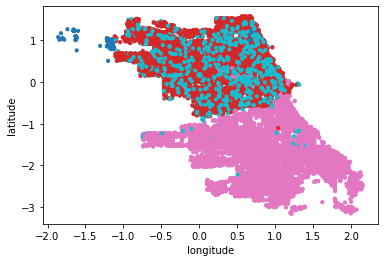

In [122]:
#visualizing the outputs
plt.scatter(df_features['LONGITUDE'], df_features['LATITUDE'], c=df_features['cluster_actual'], cmap='tab10', s=10)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()

In [129]:
#total value counts for each cluster
info = df_features.groupby('cluster_actual').agg(lambda x: x.value_counts().index[0])
print(info)

                CREATED_HOUR  CREATED_DAY_OF_WEEK  CREATED_MONTH  LATITUDE  \
cluster_actual                                                               
0                   1.097945            -1.388263            0.0  1.224410   
1                  -0.830556            -0.374019            0.0 -0.316742   
2                   0.133694            -0.374019            0.0 -1.207802   
3                   0.326545             1.654468            0.0 -0.316742   

                LONGITUDE      WARD  COMMUNITY_AREA  \
cluster_actual                                        
0               -1.650651  1.011855        1.415181   
1                0.526764 -0.186801       -0.572693   
2                0.276177 -0.832231        0.297002   
3                0.526764 -0.186801       -0.572693   

                SR_TYPE_Abandoned Vehicle Complaint  \
cluster_actual                                        
0                                                 0   
1                                  

In [130]:
# average values for each cluster
info = df_features.groupby('cluster_actual').mean()
print(info)

                CREATED_HOUR  CREATED_DAY_OF_WEEK  CREATED_MONTH  LATITUDE  \
cluster_actual                                                               
0                   0.274008             0.028771            0.0  1.222052   
1                  -0.256384            -0.639492            0.0  0.005321   
2                  -0.044275            -0.084783            0.0 -1.534538   
3                   0.150540             1.052224            0.0 -0.125340   

                LONGITUDE      WARD  COMMUNITY_AREA  \
cluster_actual                                        
0               -1.631427  1.015684        1.415405   
1                0.402600  0.140033       -0.769047   
2                0.834211 -1.636414        0.528325   
3                0.451872 -0.041561       -0.689653   

                SR_TYPE_Abandoned Vehicle Complaint  \
cluster_actual                                        
0                                          0.000892   
1                                  

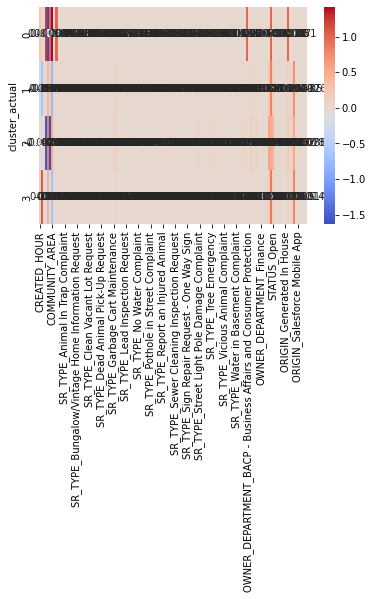

In [131]:
# visualizin the output of the means
sns.heatmap(info, annot=True, cmap='coolwarm')
plt.show()